(960, 1280, 3)
(960, 1280)


(-0.5, 1279.5, 959.5, -0.5)

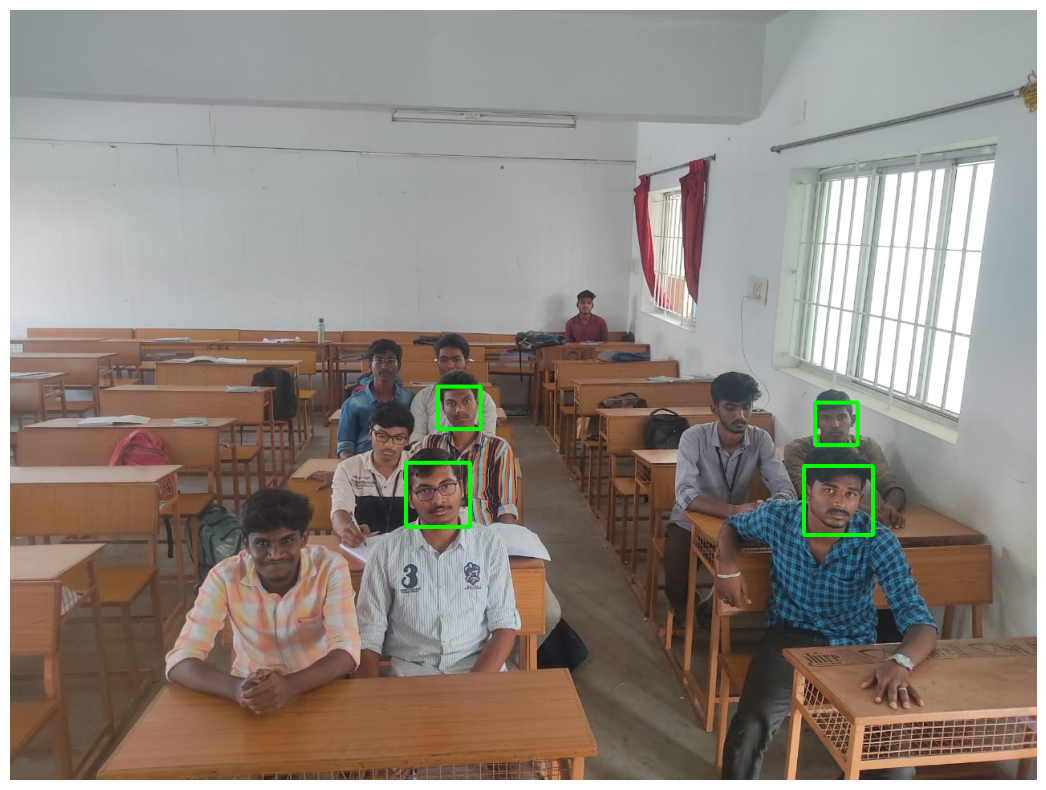

In [2]:
import cv2

imagePath = 'group_photo.jpg'

img = cv2.imread(imagePath)

print(img.shape)

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray_image.shape)

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt



plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

In [1]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

obama_image = face_recognition.load_image_file("faces\chandru.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

biden_image = face_recognition.load_image_file("faces\saravanan.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Chandru",
    "Saravana"
]
print('Learned encoding for', len(known_face_encodings), 'images.')



Learned encoding for 2 images.


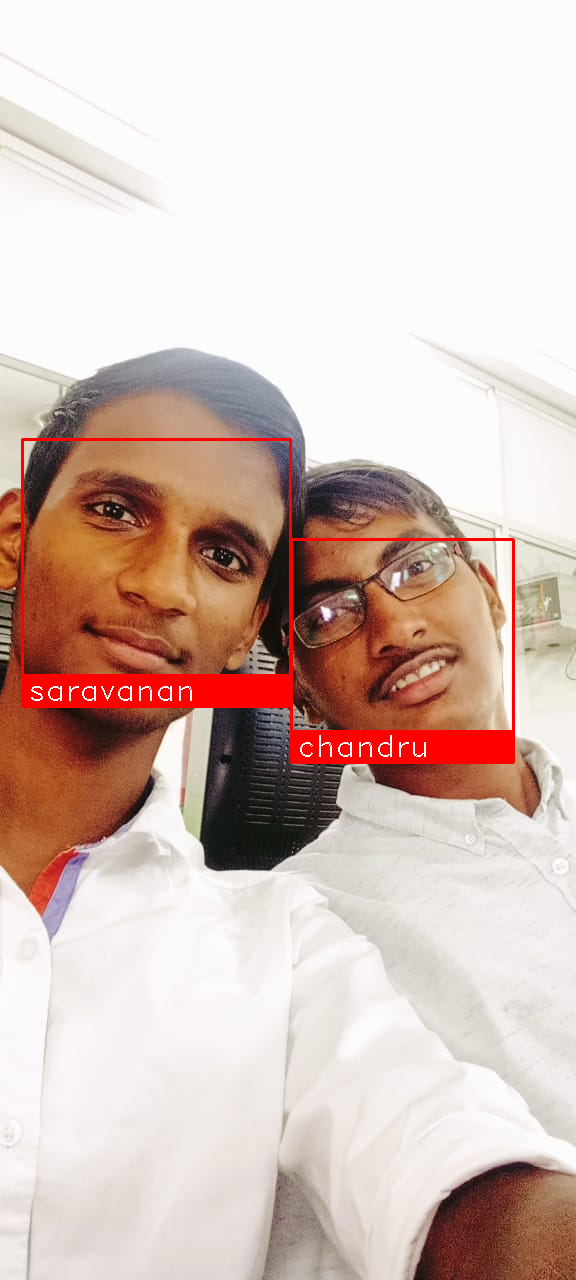

In [5]:
import face_recognition
import numpy as np
import cv2
from IPython.display import display, Image

unknown_image = face_recognition.load_image_file("WhatsApp Image 2024-02-15 at 20.29.04_eb4863b6.jpg")

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

image = cv2.imread("WhatsApp Image 2024-02-15 at 20.29.04_eb4863b6.jpg")

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)

    font = cv2.FONT_HERSHEY_DUPLEX
    text_size = cv2.getTextSize(name, font, 1, 2)[0]
    cv2.rectangle(image, (left, bottom - text_size[1] - 10), (right, bottom), (0, 0, 255), cv2.FILLED)
    cv2.putText(image, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

_, img_encoded = cv2.imencode('.png', image)
display(Image(data=img_encoded))


In [6]:
import face_recognition
import os
import pickle

def save_known_faces(known_face_encodings, known_face_names, filename):
    with open(filename, 'wb') as f:
        pickle.dump((known_face_encodings, known_face_names), f)

def encode_images_from_folder(folder_path, encoding_file):
    known_face_encodings = []
    known_face_names = []

    for file_name in os.listdir(folder_path):
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            image_path = os.path.join(folder_path, file_name)
            print("Encoding:", file_name)

            try:
                # Load the image
                image = face_recognition.load_image_file(image_path)
                # Find face locations using HOG model
                face_locations = face_recognition.face_locations(image, model="hog")
                # If at least one face is found
                if face_locations:
                    # Encode the first face found in the image
                    face_encoding = face_recognition.face_encodings(image, [face_locations[0]])[0]
                    # Extract the name from the file name without extension
                    name = os.path.splitext(file_name)[0]
                    known_face_encodings.append(face_encoding)
                    known_face_names.append(name)
                else:
                    print(f"No face found in {file_name}")
            except Exception as e:
                print(f"Error processing {file_name}: {e}")

    save_known_faces(known_face_encodings, known_face_names, encoding_file)

def main(folder_path, encoding_file):
    encode_images_from_folder(folder_path, encoding_file)
    print("Encoding completed!")

# Specify folder path and encoding file here
folder_path = "dataset"
encoding_file = "known_faces.pkl"

main(folder_path, encoding_file)


Encoding: Akilraj.jpg
Encoding: Arulmurugan.jpg
Encoding: ashiq.jpg
Encoding: Boobalamurugan.jpg
Encoding: Boobalan.jpg
Encoding: Chandru(2003).jpg
Encoding: Chandru(2004).jpg
Encoding: Chandru_N.jpg
Encoding: Dhanushraj.jpg
Encoding: Dhatchanamoorthi.jpg
Encoding: Dhiinesh.jpg
Encoding: Divyaprakash.jpg
Encoding: gokul.jpg
Encoding: Gowtham.jpg
Encoding: Hariharasudhan.jpg
Encoding: Hariprasath.jpg
Encoding: HemaChandran.jpg
Encoding: jamesnithil.jpg
Encoding: Jerun.jpg
Encoding: KrithiKumar.jpg
Encoding: Lalit.jpg
Encoding: Manoranjith.jpg
Encoding: Methunraj.jpg
Encoding: mohanraj.jpeg
Encoding: Mukilan.jpg
Encoding: NandhaBoosan.jpg
Encoding: Naresh.jpg
Encoding: naveen.jpg
Encoding: PaveenKumar.jpg
Encoding: PhilipsKumar.jpg
Encoding: Pranvkumar.jpg
Encoding: prasanna.jpg
Encoding: prasanthraj.jpg
Encoding: ravindra Rathick.jpeg
Encoding: RebhinJeevaraj.jpg
Encoding: sabarigiri.jpg
Encoding: Sabarigirivasan.jpg
Encoding: Sabarihariharen.jpg
Encoding: saravanan.jpg
Encoding: Silamb

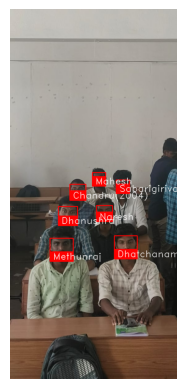

In [8]:
import face_recognition
import numpy as np
import cv2
import os
import pickle
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# image_path = r"Classroom images\IMG_4336.jpg"
image_path = r"WhatsApp Image 2024-04-24 at 19.43.04_907cf64b.jpg"

excel_filename = "recognized_names.xlsx"

def load_known_faces(filename):
    with open(filename, 'rb') as f:
        known_face_encodings, known_face_names = pickle.load(f)
    return known_face_encodings, known_face_names

known_face_encodings, known_face_names = load_known_faces('known_faces.pkl')

unknown_image = face_recognition.load_image_file(image_path)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

image = cv2.imread(image_path)

recognized_names = []

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]
        recognized_names.append((name, datetime.now()))  # Appending name along with timestamp

    cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)

    font = cv2.FONT_HERSHEY_DUPLEX
    text_size = cv2.getTextSize(name, font, 1, 2)[0]
    cv2.rectangle(image, (left, bottom - text_size[1] - 10), (right, bottom), (0, 0, 255), cv2.FILLED)
    cv2.putText(image, name, (left + 10, bottom - 6), font, 1.0, (255, 255, 255), 1)

cv2.imwrite('output_image.png', image)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis
plt.show()

# df = pd.DataFrame(recognized_names, columns=["Name", "Timestamp"])
# if os.path.exists(excel_filename):
#     df.to_excel(excel_filename, index=False, header=False, mode='a')
# else:
#     df.to_excel(excel_filename, index=False)


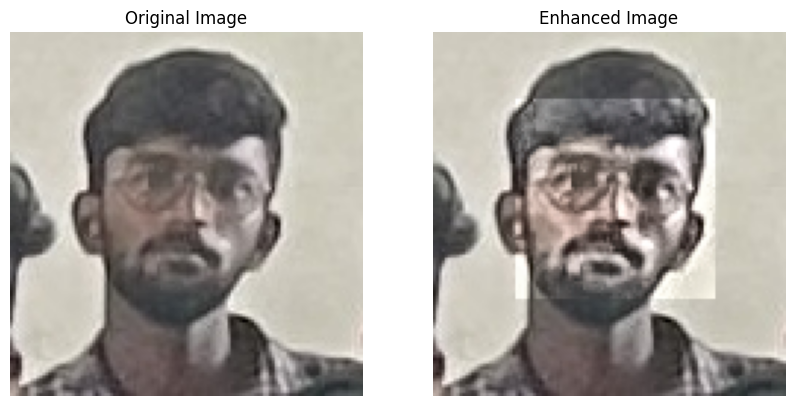

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def adjust_brightness_contrast(image, brightness=0, contrast=0):
    # Brightness adjustment
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow) / 255
        gamma_b = shadow

        # Apply brightness adjustment
        image = cv2.addWeighted(image, alpha_b, image, 0, gamma_b)

    # Contrast adjustment
    if contrast != 0:
        f = 131 * (contrast + 127) / (127 * (131 - contrast))
        alpha_c = f
        gamma_c = 127 * (1 - f)

        # Apply contrast adjustment
        image = cv2.addWeighted(image, alpha_c, image, 0, gamma_c)

    return image

def skin_smoothing(image):
    # Apply bilateral filter for smoothing
    return cv2.bilateralFilter(image, d=0, sigmaColor=20, sigmaSpace=6)

def enhance_eyes(image):
    # Convert image to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split channels
    l, a, b = cv2.split(lab)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) on the L-channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l = clahe.apply(l)

    # Merge the CLAHE enhanced L-channel with the original A and B channels
    enhanced_lab = cv2.merge((l, a, b))

    # Convert LAB image back to BGR
    enhanced_image = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)

    return enhanced_image

# Load pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load image
image_path = r"detected_faces\face_0_25.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Enhance each detected face
for (x, y, w, h) in faces:
    face = image[y:y+h, x:x+w]

    # Adjust brightness and contrast
    face = adjust_brightness_contrast(face, brightness=30, contrast=20)

    # Smooth skin
    face = skin_smoothing(face)

    # Enhance eyes
    face = enhance_eyes(face)

    # Replace the original face with the enhanced one
    image[y:y+h, x:x+w] = face

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Enhanced image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Enhanced Image')
plt.axis('off')

cv2.imwrite('enhanced_image.jpg', image)

plt.show()


In [6]:
import shutil
import os

def copy_image_to_folder(image_path, destination_folder, num_copies):
    # Check if the source file exists
    if not os.path.exists(image_path):
        print("Source image file not found.")
        return
    
    # Check if the destination folder exists, if not, create it
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
    
    # Get the filename from the source image path
    filename = os.path.basename(image_path)
    
    # Copy the image file to the destination folder multiple times
    for i in range(num_copies):
        # Construct the new filename with index
        new_filename = f"{os.path.splitext(filename)[0]}_{i}{os.path.splitext(filename)[1]}"
        
        # Construct the full path for the new file
        new_file_path = os.path.join(destination_folder, new_filename)
        
        # Copy the image file
        shutil.copy2(image_path, new_file_path)
        
        print(f"Copy {i+1}/{num_copies} completed: {new_file_path}")

def create_folder(folder_path):
    # Check if the folder already exists
    if not os.path.exists(folder_path):
        # Create the folder
        os.makedirs(folder_path)
        print(f"Folder created at: {folder_path}")
    else:
        print(f"Folder already exists at: {folder_path}")




In [7]:
import os

for file_name in os.listdir('dataset'):
    if file_name.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        image_path = os.path.join('dataset', file_name)
        new_folder = file_name.split('.')[0]
        create_folder(f'Attendance_dataset/{new_folder}')
        copy_image_to_folder(image_path,f'Attendance_dataset/{new_folder}',40)

        

Folder created at: Attendance_dataset/Aarthi
Copy 1/40 completed: Attendance_dataset/Aarthi\Aarthi_0.jpg
Copy 2/40 completed: Attendance_dataset/Aarthi\Aarthi_1.jpg
Copy 3/40 completed: Attendance_dataset/Aarthi\Aarthi_2.jpg
Copy 4/40 completed: Attendance_dataset/Aarthi\Aarthi_3.jpg
Copy 5/40 completed: Attendance_dataset/Aarthi\Aarthi_4.jpg
Copy 6/40 completed: Attendance_dataset/Aarthi\Aarthi_5.jpg
Copy 7/40 completed: Attendance_dataset/Aarthi\Aarthi_6.jpg
Copy 8/40 completed: Attendance_dataset/Aarthi\Aarthi_7.jpg
Copy 9/40 completed: Attendance_dataset/Aarthi\Aarthi_8.jpg
Copy 10/40 completed: Attendance_dataset/Aarthi\Aarthi_9.jpg
Copy 11/40 completed: Attendance_dataset/Aarthi\Aarthi_10.jpg
Copy 12/40 completed: Attendance_dataset/Aarthi\Aarthi_11.jpg
Copy 13/40 completed: Attendance_dataset/Aarthi\Aarthi_12.jpg
Copy 14/40 completed: Attendance_dataset/Aarthi\Aarthi_13.jpg
Copy 15/40 completed: Attendance_dataset/Aarthi\Aarthi_14.jpg
Copy 16/40 completed: Attendance_dataset/Aar